# Import Libraries 

In [17]:
import pandas as pd
import numpy as np
import requests
from zipfile import ZipFile
from io import BytesIO
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



 # Read Data

In [5]:
# Download the dataset
url = 'https://archive.ics.uci.edu/static/public/501/beijing+multi+site+air+quality+data.zip'
response = requests.get(url)
with ZipFile(BytesIO(response.content)) as thezip:
    thezip.extractall()

# Read the CSV files into DataFrames
files = ["PRSA_Data_Aotizhongxin_20130301-20170228.csv",
         "PRSA_Data_Changping_20130301-20170228.csv",
         "PRSA_Data_Dingling_20130301-20170228.csv",
         "PRSA_Data_Dongsi_20130301-20170228.csv",
         "PRSA_Data_Guanyuan_20130301-20170228.csv",
         "PRSA_Data_Gucheng_20130301-20170228.csv",
         "PRSA_Data_Huairou_20130301-20170228.csv",
         "PRSA_Data_Nongzhanguan_20130301-20170228.csv",
         "PRSA_Data_Shunyi_20130301-20170228.csv",
         "PRSA_Data_Tiantan_20130301-20170228.csv",
         "PRSA_Data_Wanliu_20130301-20170228.csv",
         "PRSA_Data_Wanshouxigong_20130301-20170228.csv"]

dfs = [pd.read_csv(file) for file in files]


# Concatenate all DataFrames
df = pd.concat(dfs, ignore_index=True)


In [6]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [8]:
df.shape

(420768, 18)

# Data Cleaning

In [7]:
df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [9]:
# Handle missing values
df = df.dropna()


# Convert date columns to datetime
df['time'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Drop original date columns
df = df.drop(columns=['year', 'month', 'day', 'hour', 'No'])

# Ensure all station data is in the same format
df['station'] = df['station'].astype('category')

print(df.head())


   PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   0.0  NNW   4.4   
1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   0.0    N   4.7   
2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   0.0  NNW   5.6   
3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   0.0   NW   3.1   
4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   0.0    N   2.0   

        station                time  
0  Aotizhongxin 2013-03-01 00:00:00  
1  Aotizhongxin 2013-03-01 01:00:00  
2  Aotizhongxin 2013-03-01 02:00:00  
3  Aotizhongxin 2013-03-01 03:00:00  
4  Aotizhongxin 2013-03-01 04:00:00  


In [12]:
df.shape

(382168, 14)

In [13]:
#checking duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [16]:
# Label encode the 'station' column
label_encoder = LabelEncoder()
df['station'] = label_encoder.fit_transform(df['station'])

print(df.head())



   PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   0.0  NNW   4.4   
1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   0.0    N   4.7   
2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   0.0  NNW   5.6   
3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   0.0   NW   3.1   
4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   0.0    N   2.0   

   station                time  
0        0 2013-03-01 00:00:00  
1        0 2013-03-01 01:00:00  
2        0 2013-03-01 02:00:00  
3        0 2013-03-01 03:00:00  
4        0 2013-03-01 04:00:00  


In [6]:
df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,time
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,0,2013-03-01 00:00:00
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,0,2013-03-01 01:00:00
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,0,2013-03-01 02:00:00
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,0,2013-03-01 03:00:00
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,0,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,11,2017-02-28 19:00:00
420764,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,11,2017-02-28 20:00:00
420765,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,11,2017-02-28 21:00:00
420766,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,11,2017-02-28 22:00:00


# EDA

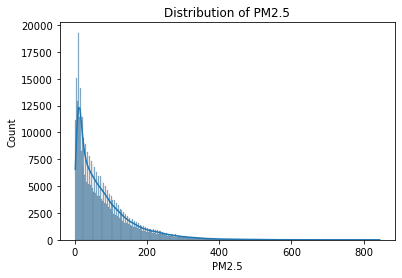

In [19]:
# Plot the distribution of PM2.5
sns.histplot(df['PM2.5'], kde=True)
plt.title('Distribution of PM2.5')
plt.show()


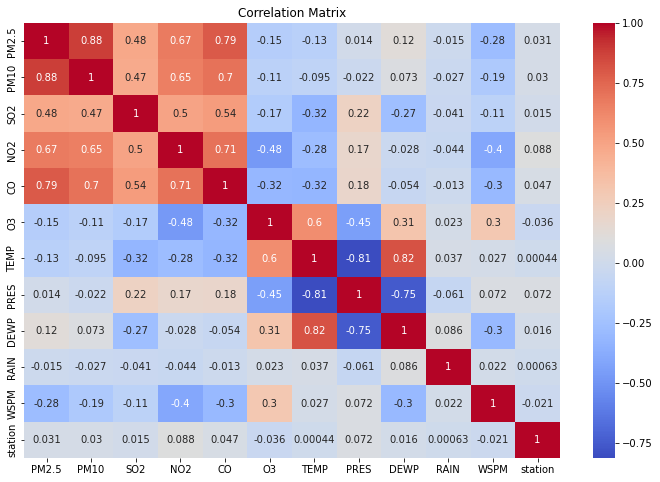

In [18]:
# Plot the correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Feature Selection & Model Building 

In [24]:
# Define features and target variable
features = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'station'] + [col for col in df.columns if col.startswith('wd_')]
target = 'PM2.5'

# Encode wind direction categorical variables
df = pd.get_dummies(df, columns=['wd'], drop_first=True)

X = df[features]
y = df[target]

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [25]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 365.34571422550175
R^2 Score: 0.942553979700289


# Visualizatins

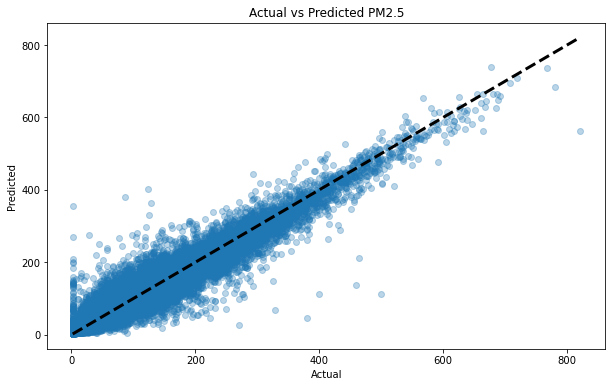

In [26]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted PM2.5')
plt.show()



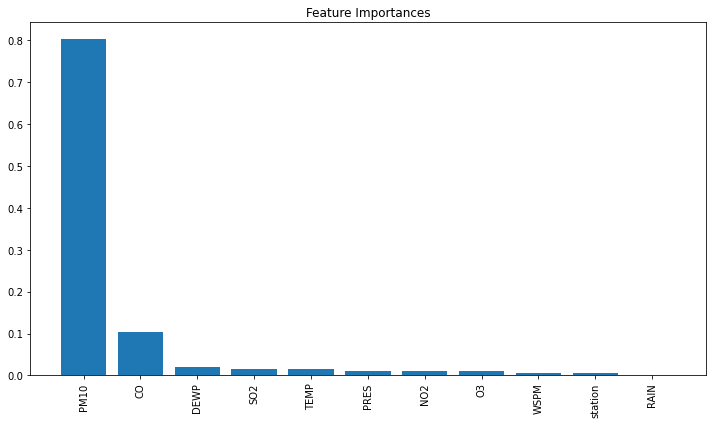

In [27]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()